In [223]:
using Interpolations
using Dierckx
using NPZ
using Plots
using PyPlot 
import PyPlot

In [224]:
push!(LOAD_PATH, "/users/giannis_kx/Julia/")

5-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/users/giannis_kx/Julia/"
 "/users/giannis_kx/Julia/"

In [253]:
include("/users/giannis_kx/Julia/Ju_Pixie.jl")

Main.Ju_Pixie

In [226]:
Ju_Pixie.b_hat_rho[1,1,1,20]

0.0019646620634602894

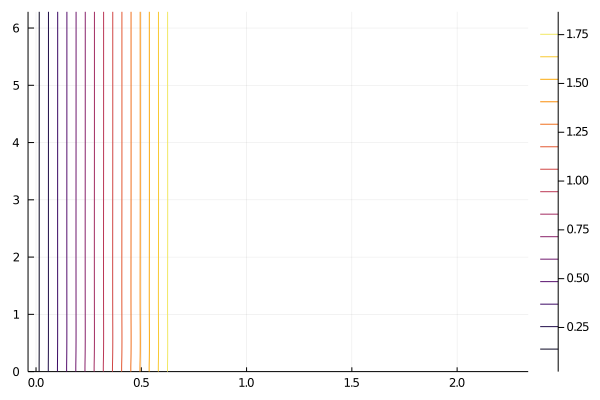

In [4]:
Ju_Pixie.test_psi_proj()

In [5]:
temp_proj = Ju_Pixie.arr_proj(Ju_Pixie.B3,Ju_Pixie.B3_eint,4,30);

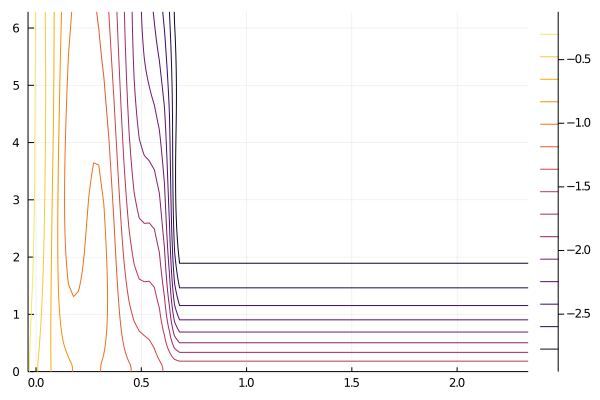

In [6]:
Plots.contour(Ju_Pixie.PS,Ju_Pixie.TF,temp_proj)

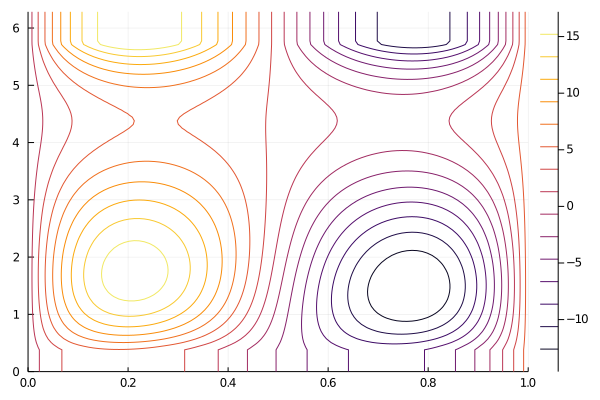

In [7]:
Ju_Pixie.flux_angle()

In [9]:
A = Ju_Pixie.B3;

In [13]:
size(A0)

(128, 65, 33)

In [12]:
A0 = A[:,:,:,1];

In [22]:
resA0 = reshape(A0,(size(A0,1),size(A0,2),size(A0,3),1));

In [23]:
size(resA0)

(128, 65, 33, 1)

In [24]:
tempA = A-A0

LoadError: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(128), Base.OneTo(65), Base.OneTo(33), Base.OneTo(40)), must have singleton at dim 4")

In [42]:
function dB(A)
    time_dim = size(A,4)
    A0 = A[:,:,:,1]
    dA = Array{Float64}(undef,(128,65,33,0))
    for time in 1:time_dim
        dA_temp = A[:,:,:,time]-A0
        dA = cat(dims=4,dA,dA_temp)
    end
    return dA
end

dB (generic function with 1 method)

In [47]:
dB1 = dB(Ju_Pixie.B1);
dB2 = dB(Ju_Pixie.B2);
dB3 = dB(Ju_Pixie.B3);

In [44]:
size(dB1)

(128, 65, 33, 40)

In [48]:
size(Ju_Pixie.dpsidr)

(128, 65, 33, 40)

In [50]:
brho = dB1 .* Ju_Pixie.dpsidr .+ dB2 .* Ju_Pixie.dpsidtheta;

In [160]:
size(brho)

(128, 65, 33, 40)

In [52]:
b_hat_rho_up = Ju_Pixie.Q .* brho

LoadError: DimensionMismatch("arrays could not be broadcast to a common size; got a dimension with lengths 100 and 128")

In [66]:
size(Ju_Pixie.Q)

(100, 40)

In [125]:
function q_grid()
    r_dim = size(Ju_Pixie.B3,1)
    u_dim = size(Ju_Pixie.B3,2)
    fi_dim = size(Ju_Pixie.B3,3)
    t_dim = size(Ju_Pixie.B3,4)
    r_range = range(0,length=r_dim,stop=1)
    t_range = range(0,length=t_dim,stop=t_dim)
    q = []
    for r in r_range
        for t in t_range
            sol = Ju_Pixie.fs_integration(r,t)
            q_rsc = -last(sol[3,length(sol.t)])/(2.0*pi)
            append!(q,q_rsc)
        end
    end
    q_gr = permutedims(reshape(q,(t_dim,r_dim)),(2,1))
    return q_gr
end

q_grid (generic function with 1 method)

In [126]:
Ju_Pixie.dpsidr_int(1,1,1,1)

-26.24307705799011

In [127]:
Q_gr = q_grid()

128×40 Array{Any,2}:
  1.06719    1.06773    1.0679    …   1.06303    1.06675    1.0573
  1.09875    1.09908    1.09927       1.09567    1.0983     1.08783
  1.23011    1.23123    1.23187       1.2397     1.22456    0.774233
  0.604302   0.604613   0.604659      0.609989   0.608017   0.637812
  1.6305     1.63484    1.63193       1.66568    1.63188    1.18109
  2.56547    2.56886    2.56818   …   2.12434    2.56753    2.14299
 20.4243    20.4561    20.4371       20.8838    20.3948     5.23437
 21.26      21.2985    21.2751       21.8242    21.2373    21.9665
 21.0697    21.1295    21.0893       21.7727    21.047     22.1636
  4.43793    4.44534    4.43625      13.3785     4.43497   22.0953
  1.98962    1.99792    1.99779   …   2.49277    1.99531   21.5465
  1.03164    1.02986    1.02954       1.50526    1.02457    3.56176
  0.999015   1.00486    1.00189       1.00896    1.00062    2.01995
  ⋮                               ⋱                        
  5.83379    5.83024    5.84063       

In [76]:
r_range = range(0,length=128,stop=1)

0.0:0.007874015748031496:1.0

In [85]:
r_range[1:128]

0.0:0.007874015748031496:1.0

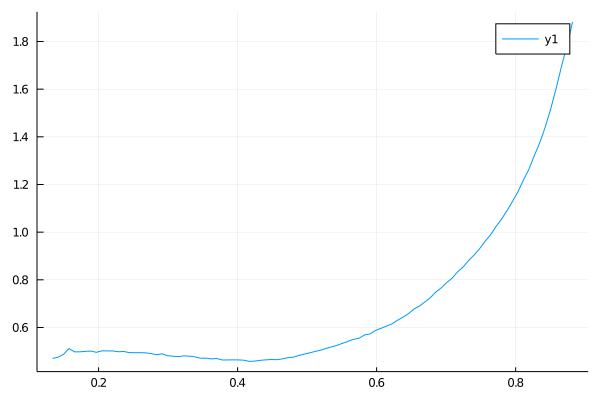

In [158]:
Plots.plot(r_range[18:113],Q_gr[18:113,40])

In [134]:
Ju_Pixie.r_of_psi[100]

0.8871906513664286

In [154]:
function bigger(arr)
    r_dim = 128
    u_dim = 65
    fi_dim = 33
    t_dim = 40
    big_arr = []
    for r_ind in 1:r_dim
        for t_ind in 1:t_dim
            for u_ind in 1:u_dim
                for fi_ind in 1:fi_dim
                    append!(big_arr, arr[r_ind,t_ind])
                end
            end
        end
    end
    
    comp_arr = permutedims(reshape(big_arr,fi_dim,u_dim,t_dim,r_dim),(4,2,1,3))
    return comp_arr
end

bigger (generic function with 1 method)

In [155]:
Q_big = bigger(Q_gr)

128×65×33×40 Array{Any,4}:
[:, :, 1, 1] =
  1.06719    1.06719    1.06719   …   1.06719    1.06719    1.06719
  1.09875    1.09875    1.09875       1.09875    1.09875    1.09875
  1.23011    1.23011    1.23011       1.23011    1.23011    1.23011
  0.604302   0.604302   0.604302      0.604302   0.604302   0.604302
  1.6305     1.6305     1.6305        1.6305     1.6305     1.6305
  2.56547    2.56547    2.56547   …   2.56547    2.56547    2.56547
 20.4243    20.4243    20.4243       20.4243    20.4243    20.4243
 21.26      21.26      21.26         21.26      21.26      21.26
 21.0697    21.0697    21.0697       21.0697    21.0697    21.0697
  4.43793    4.43793    4.43793       4.43793    4.43793    4.43793
  1.98962    1.98962    1.98962   …   1.98962    1.98962    1.98962
  1.03164    1.03164    1.03164       1.03164    1.03164    1.03164
  0.999015   0.999015   0.999015      0.999015   0.999015   0.999015
  ⋮                               ⋱                        
  5.83379    5.833

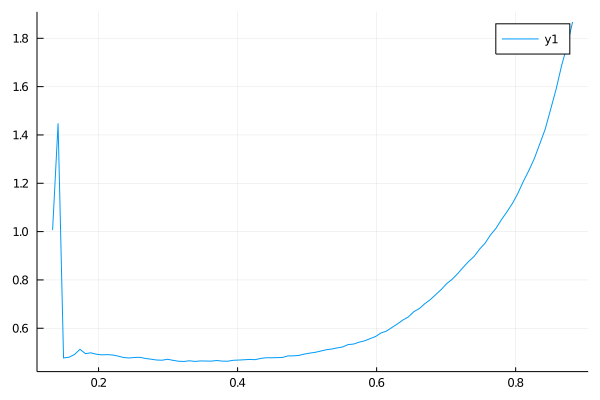

In [159]:
Plots.plot(r_range[18:113],Q_big[18:113,20,20,30])

In [156]:
size(Q_big)

(128, 65, 33, 40)

In [161]:
b_hat_rho_up = Q_big .* brho

128×65×33×40 Array{Float64,4}:
[:, :, 1, 1] =
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  …   0.0   0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0      0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0      0.0   0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  …   0.0   0.0   0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0      0.0   0.0   0.0   0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0      0.0   0.0   0.0   0.0   0.0  -0.0
  0.0   0.0  -0.0  -0.0  -0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0

In [166]:
function divide_arr(A,B)
    time_dim = size(A,4)
    r_dim = size(A,1)
    u_dim = size(A,2)
    fi_dim = size(A,3)
    B0 = B[:,:,:,1]
    div = Array{Float64}(undef,(r_dim,u_dim,fi_dim,0))
    for time in 1:time_dim
        div_temp = A[:,:,:,time] ./ B0
        div = cat(dims=4,div,div_temp)
    end
    return div
end

divide_arr (generic function with 1 method)

In [167]:
b_hat_rho = divide_arr(b_hat_rho_up,Ju_Pixie.B3)

128×65×33×40 Array{Float64,4}:
[:, :, 1, 1] =
  0.0   0.0   0.0   0.0   0.0   0.0  …  -0.0  -0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0     -0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0     -0.0  -0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …  -0.0  -0.0  -0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0     -0.0  -0.0  -0.0  -0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0     -0.0  -0.0  -0.0  -0.0  -0.0   0.0
 -0.0  -0.0   0.0   0.0   0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0

In [169]:
size(Ju_Pixie.b_hat_rho)

(128, 65, 33, 40)

In [250]:
function arr_proj(arr,arr_eint,phi,time)
    psi_list = []
    uf_list = []
    arr_int_list = []
    ls = []
    
    for i in keys(Ju_Pixie.loaded_dict)
        l_min = Ju_Pixie.loaded_dict[i[1],"0"]["l_u"](0.001)
        l_max = Ju_Pixie.loaded_dict[i[1],"0"]["l_u"](6.28)
        ls = range(l_min,length=30,stop=l_max)
        for l in ls
            r = Ju_Pixie.loaded_dict[i[1],"0"]["r_l"](l)
            u = Ju_Pixie.loaded_dict[i[1],"0"]["u_l"](l)
            uf = Ju_Pixie.loaded_dict[i[1],"0"]["uf_l"](l)
            append!(psi_list,(parse(Float64,i[1])-Ju_Pixie.psi_min)/(Ju_Pixie.norm-Ju_Pixie.psi_min))
            append!(uf_list,uf)
            append!(arr_int_list,arr_eint(r,u,phi,time))
        end            
    end
    x=0.1
    
    spl = try
        Spline2D(uf_list,psi_list,arr_int_list,s=x);
    catch
        try
            x = 2*x
            #println("x=",x)
            spl = Spline2D(uf_list,psi_list,arr_int_list,s=x)
        catch
        end
    end
    zi = try
        Dierckx.evalgrid(spl,Ju_Pixie.PS,Ju_Pixie.TF);
    catch
        zi = zeros(Float64,(100,100))
    end
    return zi
end

arr_proj (generic function with 1 method)

In [251]:
function proj_whole_array(arr,arr_eint)
    fi_dims = size(arr,3)
    t_dims = size(arr,4)
    
    whole_array = Array{Float64}(undef,(100,100,0))
    
    for fi in 1:fi_dims
        for t in 1:t_dims
            println("fi=",fi,"t=",t)
            temp = arr_proj(arr,arr_eint,fi,t)
            whole_array = cat(dims=3,whole_array,temp)
        end
    end
    whole_array = permutedims(reshape(whole_array,(100,100,t_dims,fi_dims)),(1,2,4,3))
    return whole_array
end            

proj_whole_array (generic function with 1 method)

In [252]:
WA = proj_whole_array(Ju_Pixie.b_hat_rho,Ju_Pixie.b_hat_rho_eint)

fi=1t=1
fi=1t=2
fi=1t=3
fi=1t=4
fi=1t=5
fi=1t=6
fi=1t=7
fi=1t=8
fi=1t=9
fi=1t=10
fi=1t=11
fi=1t=12
fi=1t=13
fi=1t=14
fi=1t=15
fi=1t=16
fi=1t=17
fi=1t=18
fi=1t=19
fi=1t=20
fi=1t=21
fi=1t=22
fi=1t=23
fi=1t=24
fi=1t=25
fi=1t=26
fi=1t=27
fi=1t=28
fi=1t=29
fi=1t=30
fi=1t=31
fi=1t=32
fi=1t=33
fi=1t=34
fi=1t=35
fi=1t=36
fi=1t=37
fi=1t=38
fi=1t=39
fi=1t=40
fi=2t=1
fi=2t=2
fi=2t=3
fi=2t=4
fi=2t=5
fi=2t=6
fi=2t=7
fi=2t=8
fi=2t=9
fi=2t=10
fi=2t=11
fi=2t=12
fi=2t=13
fi=2t=14
fi=2t=15
fi=2t=16
fi=2t=17
fi=2t=18
fi=2t=19
fi=2t=20
fi=2t=21
fi=2t=22
fi=2t=23
fi=2t=24
fi=2t=25
fi=2t=26
fi=2t=27
fi=2t=28
fi=2t=29
fi=2t=30
fi=2t=31
fi=2t=32
fi=2t=33
fi=2t=34
fi=2t=35
fi=2t=36
fi=2t=37
fi=2t=38
fi=2t=39
fi=2t=40
fi=3t=1
fi=3t=2
fi=3t=3
fi=3t=4
fi=3t=5
fi=3t=6
fi=3t=7
fi=3t=8
fi=3t=9
fi=3t=10
fi=3t=11
fi=3t=12
fi=3t=13
fi=3t=14
fi=3t=15
fi=3t=16
fi=3t=17
fi=3t=18
fi=3t=19
fi=3t=20
fi=3t=21
fi=3t=22
fi=3t=23
fi=3t=24
fi=3t=25
fi=3t=26
fi=3t=27
fi=3t=28
fi=3t=29
fi=3t=30
fi=3t=31
fi=3t=32
fi=3t=33
fi=3t=34
f

fi=22t=36
fi=22t=37
fi=22t=38
fi=22t=39
fi=22t=40
fi=23t=1
fi=23t=2
fi=23t=3
fi=23t=4
fi=23t=5
fi=23t=6
fi=23t=7
fi=23t=8
fi=23t=9
fi=23t=10
fi=23t=11
fi=23t=12
fi=23t=13
fi=23t=14
fi=23t=15
fi=23t=16
fi=23t=17
fi=23t=18
fi=23t=19
fi=23t=20
fi=23t=21
fi=23t=22
fi=23t=23
fi=23t=24
fi=23t=25
fi=23t=26
fi=23t=27
fi=23t=28
fi=23t=29
fi=23t=30
fi=23t=31
fi=23t=32
fi=23t=33
fi=23t=34
fi=23t=35
fi=23t=36
fi=23t=37
fi=23t=38
fi=23t=39
fi=23t=40
fi=24t=1
fi=24t=2
fi=24t=3
fi=24t=4
fi=24t=5
fi=24t=6
fi=24t=7
fi=24t=8
fi=24t=9
fi=24t=10
fi=24t=11
fi=24t=12
fi=24t=13
fi=24t=14
fi=24t=15
fi=24t=16
fi=24t=17
fi=24t=18
fi=24t=19
fi=24t=20
fi=24t=21
fi=24t=22
fi=24t=23
fi=24t=24
fi=24t=25
fi=24t=26
fi=24t=27
fi=24t=28
fi=24t=29
fi=24t=30
fi=24t=31
fi=24t=32
fi=24t=33
fi=24t=34
fi=24t=35
fi=24t=36
fi=24t=37
fi=24t=38
fi=24t=39
fi=24t=40
fi=25t=1
fi=25t=2
fi=25t=3
fi=25t=4
fi=25t=5
fi=25t=6
fi=25t=7
fi=25t=8
fi=25t=9
fi=25t=10
fi=25t=11
fi=25t=12
fi=25t=13
fi=25t=14
fi=25t=15
fi=25t=16
fi=25t=17
fi=25t=

100×100×33×40 Array{Float64,4}:
[:, :, 1, 1] =
  0.000142558   0.000156434   0.000174566  …   5.25527e-5   5.25527e-5
  0.000142558   0.000156434   0.000174566      5.25527e-5   5.25527e-5
  0.000141838   0.000155396   0.000173096      5.19387e-5   5.19387e-5
  0.000140039   0.000152827   0.000169483      5.04461e-5   5.04461e-5
  0.000138197   0.000150232   0.000165867      4.89749e-5   4.89749e-5
  0.000136311   0.000147611   0.000162249  …   4.75252e-5   4.75252e-5
  0.000134384   0.000144964   0.000158629      4.60968e-5   4.60968e-5
  0.000132414   0.000142293   0.000155008      4.46897e-5   4.46897e-5
  0.000130405   0.000139598   0.000151385      4.33036e-5   4.33036e-5
  0.000128354   0.000136879   0.000147762      4.19385e-5   4.19385e-5
  0.000126265   0.000134136   0.000144138  …   4.05944e-5   4.05944e-5
  0.000124137   0.000131372   0.000140514      3.9271e-5    3.9271e-5
  0.000121971   0.000128585   0.000136891      3.79684e-5   3.79684e-5
  ⋮                            

In [53]:
@time temp = arr_proj(Ju_Pixie.b_hat_rho,Ju_Pixie.b_hat_rho_eint,4,34)

x=2
  0.203954 seconds (102.78 k allocations: 13.265 MiB)


In [57]:
typeof(temp)

Nothing

In [47]:
function cat_temp(T)
    temp = Array{Float64}(undef,(100,100,0))
    Threads.@threads for u in 1:40
         for t in 1:33
            temp = cat(dims=3,temp,T)
        end
    end
    temp2 = reshape(temp,(100,100,33,40))
    return temp2
end

cat_temp (generic function with 1 method)

In [48]:
@time temp2 = cat_temp(temp)

 41.916825 seconds (189.20 k allocations: 64.967 GiB, 9.51% gc time)


100×100×33×40 Array{Float64,4}:
[:, :, 1, 1] =
 -0.2941    -0.372039  -0.478165  -0.562996  …  -1.45207  -1.45207  -1.45207
 -0.2941    -0.372039  -0.478165  -0.562996     -1.45207  -1.45207  -1.45207
 -0.29471   -0.372584  -0.478635  -0.563421     -1.44209  -1.44209  -1.44209
 -0.296169  -0.373878  -0.479734  -0.564394     -1.41788  -1.41788  -1.41788
 -0.29757   -0.375109  -0.480752  -0.565264     -1.39437  -1.39437  -1.39437
 -0.298915  -0.376273  -0.481683  -0.566025  …  -1.37185  -1.37185  -1.37185
 -0.300203  -0.377368  -0.482525  -0.56667      -1.35065  -1.35065  -1.35065
 -0.301434  -0.378393  -0.483271  -0.567194     -1.33107  -1.33107  -1.33107
 -0.302608  -0.379344  -0.483917  -0.567591     -1.31344  -1.31344  -1.31344
 -0.303726  -0.380221  -0.484458  -0.567856     -1.29807  -1.29807  -1.29807
 -0.304787  -0.381019  -0.48489   -0.567982  …  -1.28526  -1.28526  -1.28526
 -0.305792  -0.381737  -0.485208  -0.567965     -1.27533  -1.27533  -1.27533
 -0.306741  -0.382373  -0.485

In [22]:
size(temp2)

(100, 100, 10)

In [11]:
function array_creation()
    for i in 1:10
        x_i = []
        append!(x_i,i+1)
        println(x_i[1])
    end
    
end

array_creation (generic function with 1 method)

In [49]:
Threads.nthreads()

1

In [46]:
run(`export` "JULIA_NUM_THREADS = 4")

LoadError: syntax: missing comma or ) in argument list

In [79]:
function error()
    x=4
    i=0
    try
        prix == i
    catch e
    println(e)
     #   i = i+1
     #   x = i
    end
    return 0
end

error (generic function with 1 method)

In [80]:
error()

0

In [78]:
1==2

false